In [49]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Saran Suaysukwicha 6030823821")

Saran Suaysukwicha 6030823821


In [59]:
#download ข้อมูลจากตัวเครื่อง
firedata = pd.read_csv("D:/4Survey/Data Science/Data/Fire_Data.csv")
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,01-12-19 0:00,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,01-12-19 0:00,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,01-12-19 0:00,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,01-12-19 0:00,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,01-12-19 0:00,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,04-04-20 0:00,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,04-04-20 0:00,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,04-04-20 0:00,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,04-04-20 0:00,2003,N,VIIRS,n,1,292.7,2.9,0


In [60]:
# Plot Graph X = Lat , Y = Lon , Z = Time
#ACQ_Time 635 คือ 6.35 น.
firedata.ACQ_TIME.unique()
#ต้องการทำ ACQ_Time เป็นชั่วโมง นาที รวมกับ วัน สร้างเป็น Date_Time ใหม่

array([ 635,  636, 1906, 1907,  617,  618, 1847, 1848,  558,  559, 1828,
       1829,  540,  719,  720, 1810, 1950,  700,  701, 1931,  641,  642,
        643, 1913,  623,  624, 1854,  604,  605, 1835, 1836,  545,  546,
        726,  727, 1816, 1956,  707,  708, 1938,  648,  649, 1919,  629,
        630, 1900, 1901,  610,  611, 1841, 1842,  552, 1822, 1823,  533,
        534,  713,  714, 1944,  654,  655, 1925, 1926,  616, 1951, 1932,
       1912, 1853, 1834,  725, 1815, 1957,  551, 1804, 1943,  557,  738,
        539, 1809,  622,  706, 1757, 1937,  647, 1918, 1859,  732, 1803,
       1924,  603,  628, 1840,  731, 1821,  712,  653, 1905, 1949, 2002,
        739, 1817,  733, 2003, 1945, 1855, 1920], dtype=int64)

In [61]:
firedata['RealTime'] = firedata['ACQ_TIME'] #Create new column
firedata['RealTime'] = (firedata['RealTime'])/100 #หาร100 ให้หน้า . เป็นชั่วโมง หลังเป็น นาที
firedata['RealTime'] = firedata['RealTime'].astype(str) #convert to string
firedata['RealTime']

0         6.35
1         6.35
2         6.35
3         6.35
4         6.35
         ...  
79229    20.03
79230    20.03
79231    20.03
79232    20.03
79233    20.03
Name: RealTime, Length: 79234, dtype: object

In [62]:
firedata['RealTime'] = firedata['RealTime'].str.replace(".", ":") #Replace string . to : for convert to Time frome
firedata['RealTime']

0         6:35
1         6:35
2         6:35
3         6:35
4         6:35
         ...  
79229    20:03
79230    20:03
79231    20:03
79232    20:03
79233    20:03
Name: RealTime, Length: 79234, dtype: object

In [63]:
firedata['RealTime'] = pd.to_datetime( firedata['ACQ_DATE'].astype(str)+' '+firedata['RealTime'] ) 
#เอา เวลาที่เพิ่งสร้างมาต่อกับวันที่ แล้วแปลงเป็น Type ปี-เดือน-วัน ชั่วโมง:นาที:วินาที  ฟอร์มอื่นไม่ได้ไม่รู้ทำไม
firedata['RealTime']

0       2019-01-12 06:35:00
1       2019-01-12 06:35:00
2       2019-01-12 06:35:00
3       2019-01-12 06:35:00
4       2019-01-12 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: RealTime, Length: 79234, dtype: datetime64[ns]

In [92]:
firedataA = firedata[["LATITUDE","LONGITUDE","RealTime","ACQ_DATE"]]
firedataA

,LATITUDE,LONGITUDE,RealTime,ACQ_DATE
0,16.33696,98.70137,2019-01-12 06:35:00,01-12-19 0:00
1,16.48906,98.73961,2019-01-12 06:35:00,01-12-19 0:00
2,16.93571,99.06874,2019-01-12 06:35:00,01-12-19 0:00
3,16.54092,98.59869,2019-01-12 06:35:00,01-12-19 0:00
4,16.87473,98.63222,2019-01-12 06:35:00,01-12-19 0:00
...,...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00,04-04-20 0:00
79230,17.77545,97.85637,2020-04-04 20:03:00,04-04-20 0:00
79231,17.76847,97.79116,2020-04-04 20:03:00,04-04-20 0:00
79232,17.77518,97.82606,2020-04-04 20:03:00,04-04-20 0:00


In [93]:
firedataA['dif'] = firedataA['RealTime'] - firedataA['RealTime'].iloc[0]
firedataA['datetime_dif'] = (firedataA['dif'].dt.total_seconds())/86400
firedataA

<ipython-input-93-55933713fde9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firedataA['dif'] = firedataA['RealTime'] - firedataA['RealTime'].iloc[0]
<ipython-input-93-55933713fde9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firedataA['datetime_dif'] = (firedataA['dif'].dt.total_seconds())/86400


,LATITUDE,LONGITUDE,RealTime,ACQ_DATE,dif,datetime_dif
0,16.33696,98.70137,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
1,16.48906,98.73961,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
2,16.93571,99.06874,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
3,16.54092,98.59869,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
4,16.87473,98.63222,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00,04-04-20 0:00,448 days 13:28:00,448.561111
79230,17.77545,97.85637,2020-04-04 20:03:00,04-04-20 0:00,448 days 13:28:00,448.561111
79231,17.76847,97.79116,2020-04-04 20:03:00,04-04-20 0:00,448 days 13:28:00,448.561111
79232,17.77518,97.82606,2020-04-04 20:03:00,04-04-20 0:00,448 days 13:28:00,448.561111


In [94]:
sevendays = firedataA.head(900)
sevendays
#คัดเลือกมา 7 วัน ประมาณ 900 บรรทัด หรือเกิน 7 วัน

,LATITUDE,LONGITUDE,RealTime,ACQ_DATE,dif,datetime_dif
0,16.33696,98.70137,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
1,16.48906,98.73961,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
2,16.93571,99.06874,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
3,16.54092,98.59869,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
4,16.87473,98.63222,2019-01-12 06:35:00,01-12-19 0:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...
895,17.61055,99.19306,2019-10-12 07:07:00,10-12-19 0:00,273 days 00:32:00,273.022222
896,19.44932,99.80214,2019-10-12 07:07:00,10-12-19 0:00,273 days 00:32:00,273.022222
897,16.73219,98.58803,2019-10-12 07:07:00,10-12-19 0:00,273 days 00:32:00,273.022222
898,16.64279,98.54565,2019-10-12 07:07:00,10-12-19 0:00,273 days 00:32:00,273.022222


In [5]:
# สร้าง Array ของแต่ละ Column

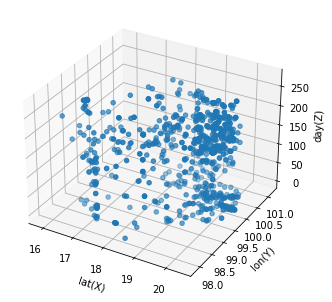

In [95]:
#Plot ละติจูด ลองจิจูด เวลา
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = Axes3D(fig)
a.scatter(sevendays['LATITUDE'], sevendays['LONGITUDE'], sevendays['datetime_dif'])
a.set_xlabel('lat(X)')
a.set_ylabel('lon(Y)')
a.set_zlabel('day(Z)')
plt.show()

In [96]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
#จะแบ่ง Cluster ด้วยวิธี DBSCAN

In [99]:
My7data = sevendays[["LATITUDE","LONGITUDE","datetime_dif"]]
My7data

,LATITUDE,LONGITUDE,datetime_dif
0,16.33696,98.70137,0.000000
1,16.48906,98.73961,0.000000
2,16.93571,99.06874,0.000000
3,16.54092,98.59869,0.000000
4,16.87473,98.63222,0.000000
...,...,...,...
895,17.61055,99.19306,273.022222
896,19.44932,99.80214,273.022222
897,16.73219,98.58803,273.022222
898,16.64279,98.54565,273.022222


In [100]:
sevenarray = np.array(My7data.values.tolist())
sevenarray
#แบ่งข้อมูลเป็น Array

array([[ 16.33696   ,  98.70137   ,   0.        ],
       [ 16.48906   ,  98.73961   ,   0.        ],
       [ 16.93571   ,  99.06874   ,   0.        ],
       ...,
       [ 16.73219   ,  98.58803   , 273.02222222],
       [ 16.64279   ,  98.54565   , 273.02222222],
       [ 16.70056   ,  98.59203   , 273.02222222]])

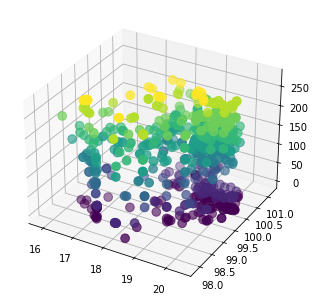

In [124]:
model = DBSCAN(eps=25, min_samples=15)
model.fit_predict(sevenarray)
pred = model.fit_predict(sevenarray)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sevenarray[:,0], sevenarray[:,1], sevenarray[:,2], c=model.labels_, s=75)
#ให้ Plot Lat Lon เวลา
ax.view_init(azim=300)
plt.show()
#สีม่วงคือ Outlier

In [125]:
model_label = model.labels_
model_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [126]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(sevenarray, model_label)

0.956882616487655